In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB  
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv('bank-full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# Data Processing P1

In [12]:
data.select_dtypes(include='object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Target        2
dtype: int64

# Exploratory Data Analyst

## Với các biến Catergorical

In [66]:
# Lấy ra tên tất cả cột loại object 
col_vars = data.select_dtypes(include='object').columns.tolist()

### Tạo biểu đồ countplot

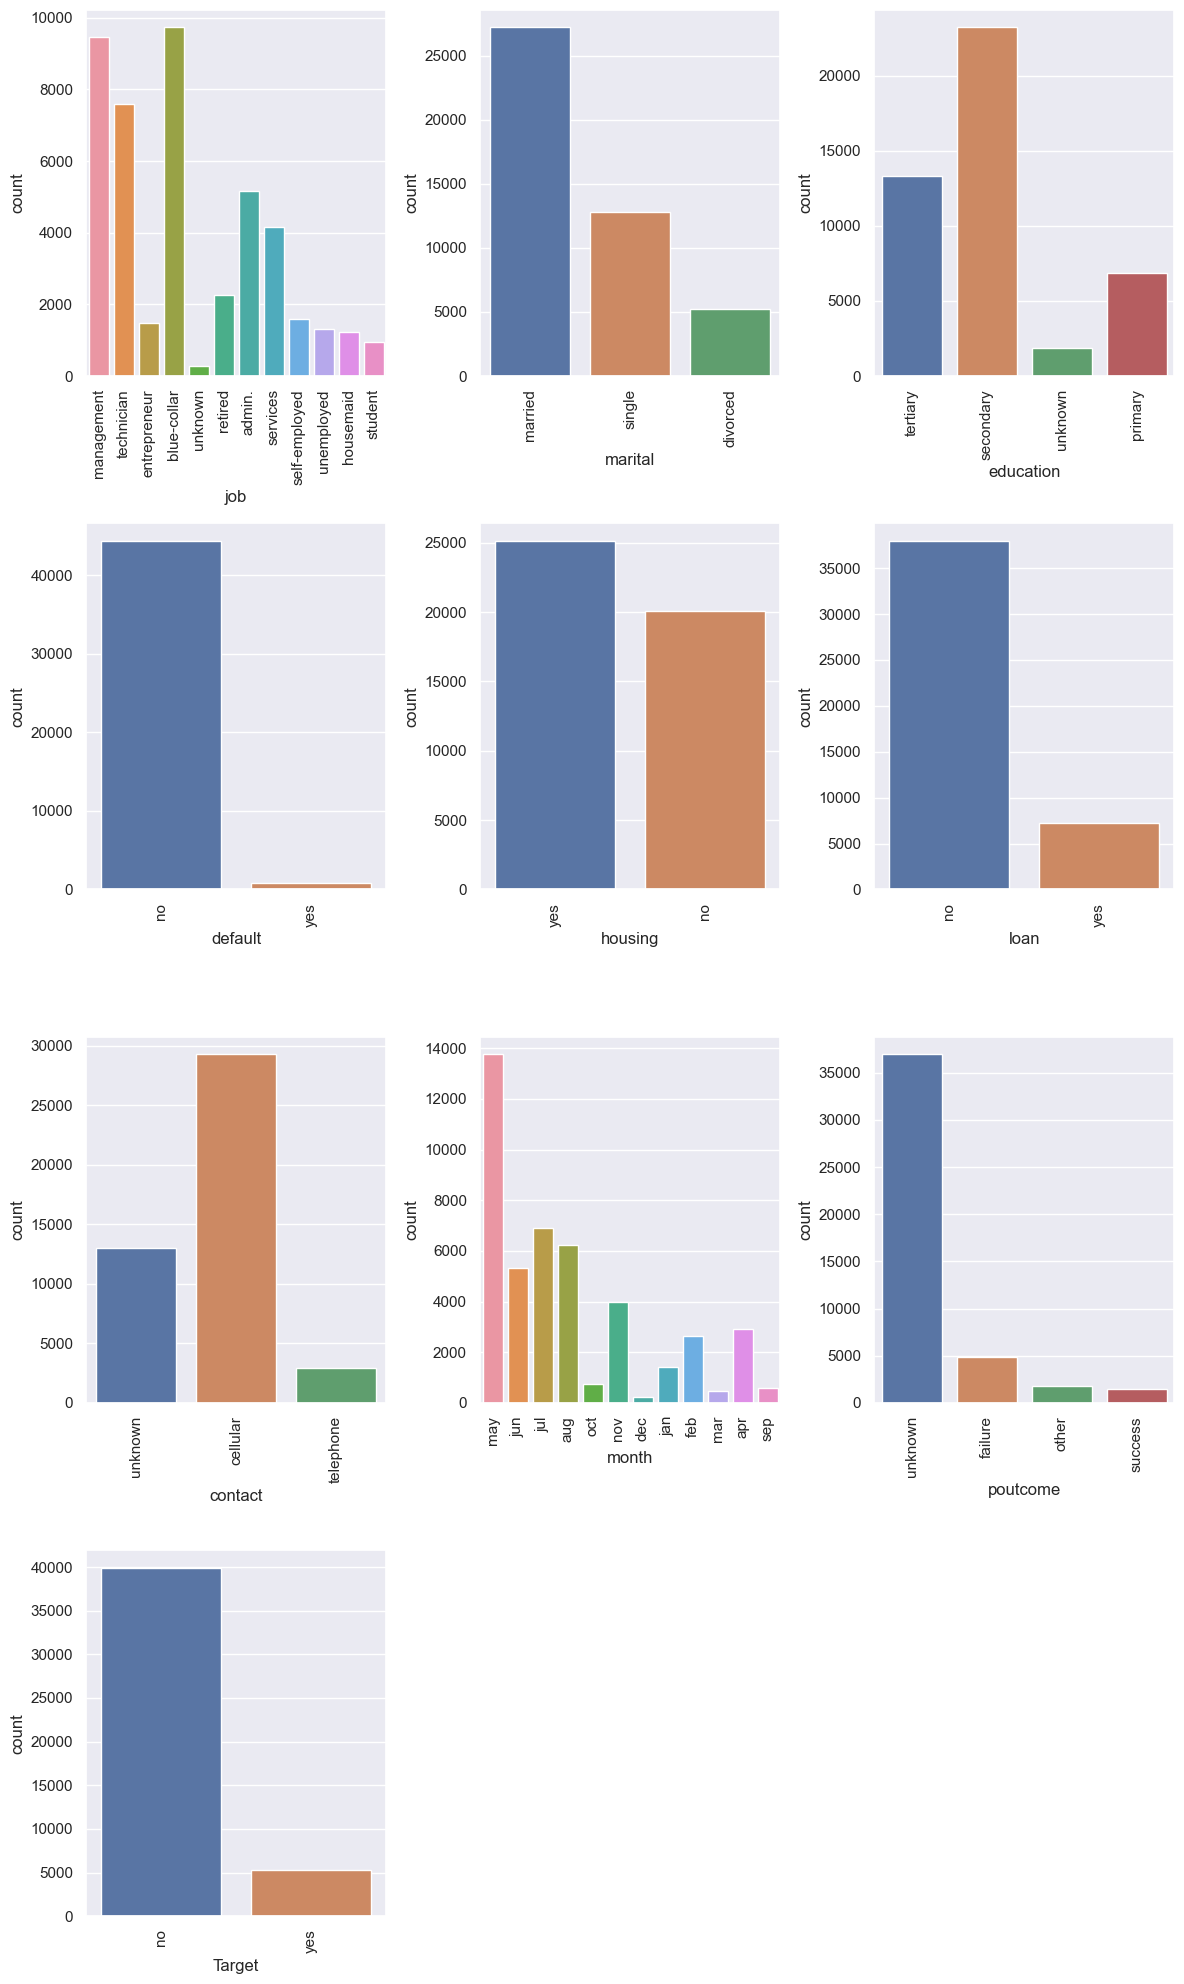

In [55]:
# Tạo biểu đồ với subplots
num_col = len(col_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo một countplot với mỗi biến catergorical sử dụng Seaborn
for i, var in enumerate(col_vars):
    sns.countplot(x = var, data =data, ax = ax[i])
#     ax[i].set_title(var)
    ax[i].tick_params(axis = 'x', rotation = 90)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

#### Countplot cùng với sự phân biệt là Target

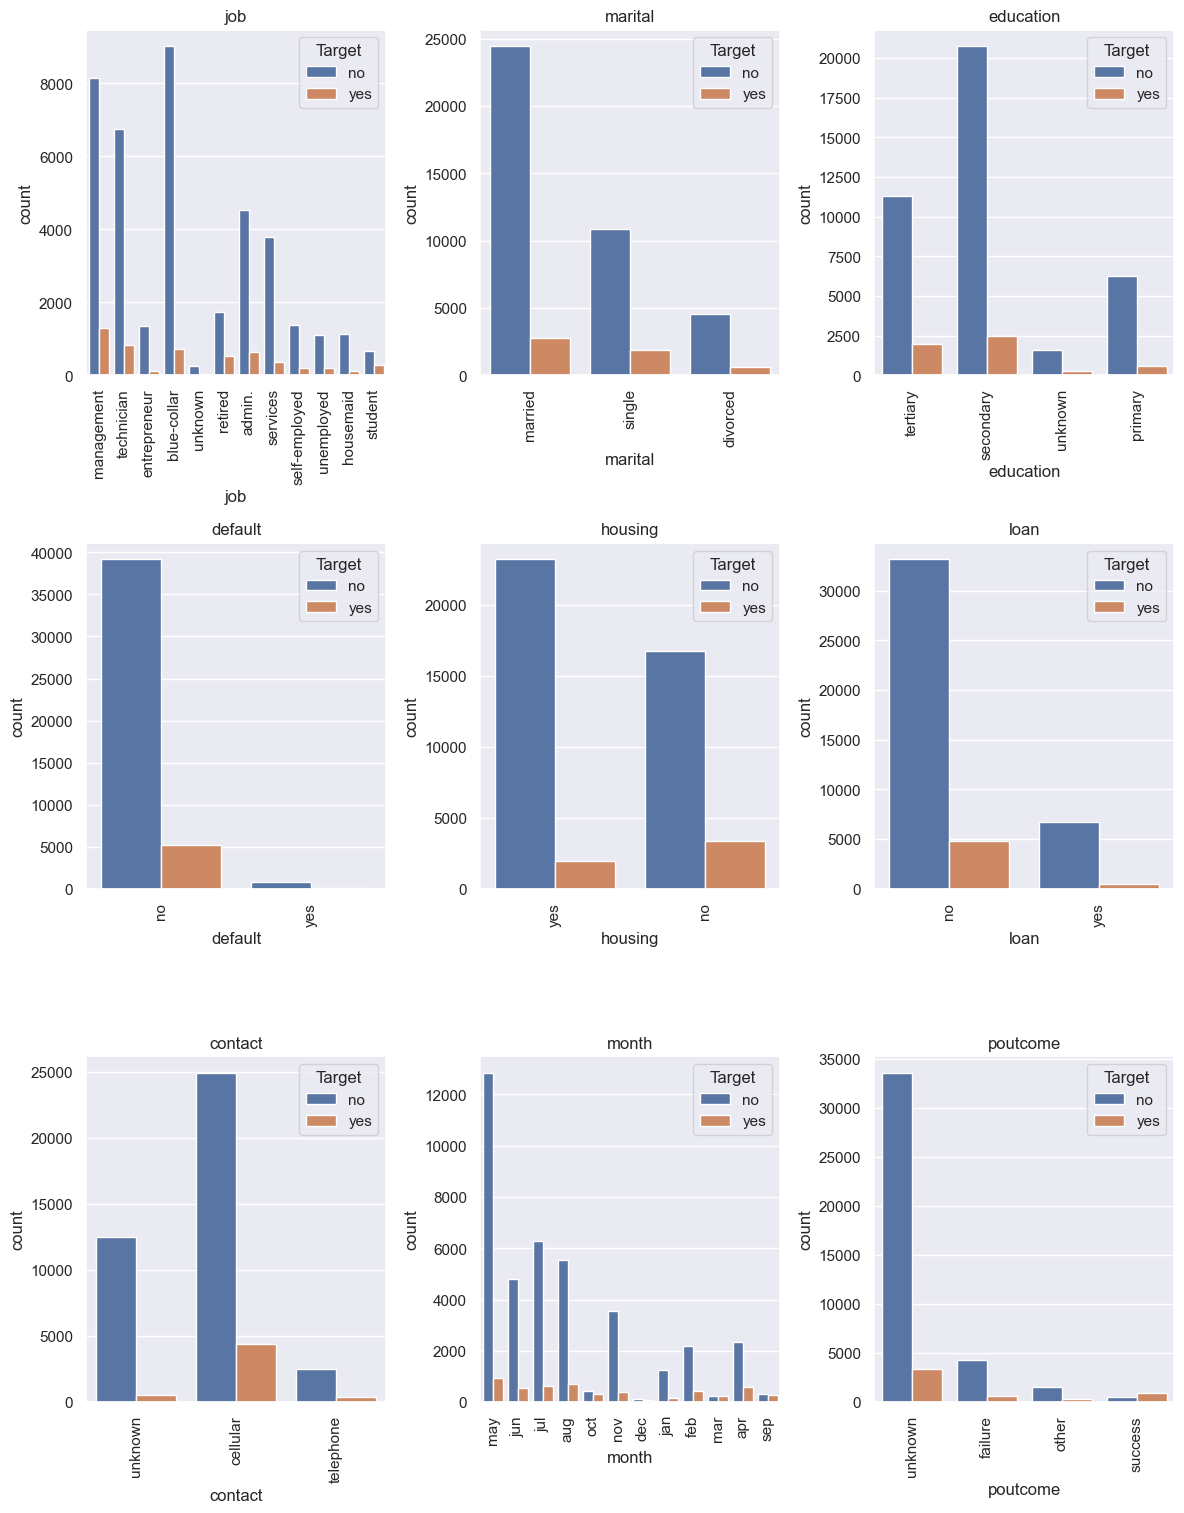

In [56]:
# Tạo biểu đồ với subplots
num_col = len(col_vars)
num_row = (num_col + 2) //3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo một countplot với mỗi biến catergorical sử dụng Seaborn với 'Target' là hue
for i, var in enumerate(col_vars):
    sns.countplot(x = var,data =data, hue = 'Target', ax = ax[i])
    ax[i].set_title(var)
    ax[i].tick_params(axis = 'x', rotation = 90)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
fig.delaxes(ax[9])
plt.show()

### Tạo biểu đồ histogram

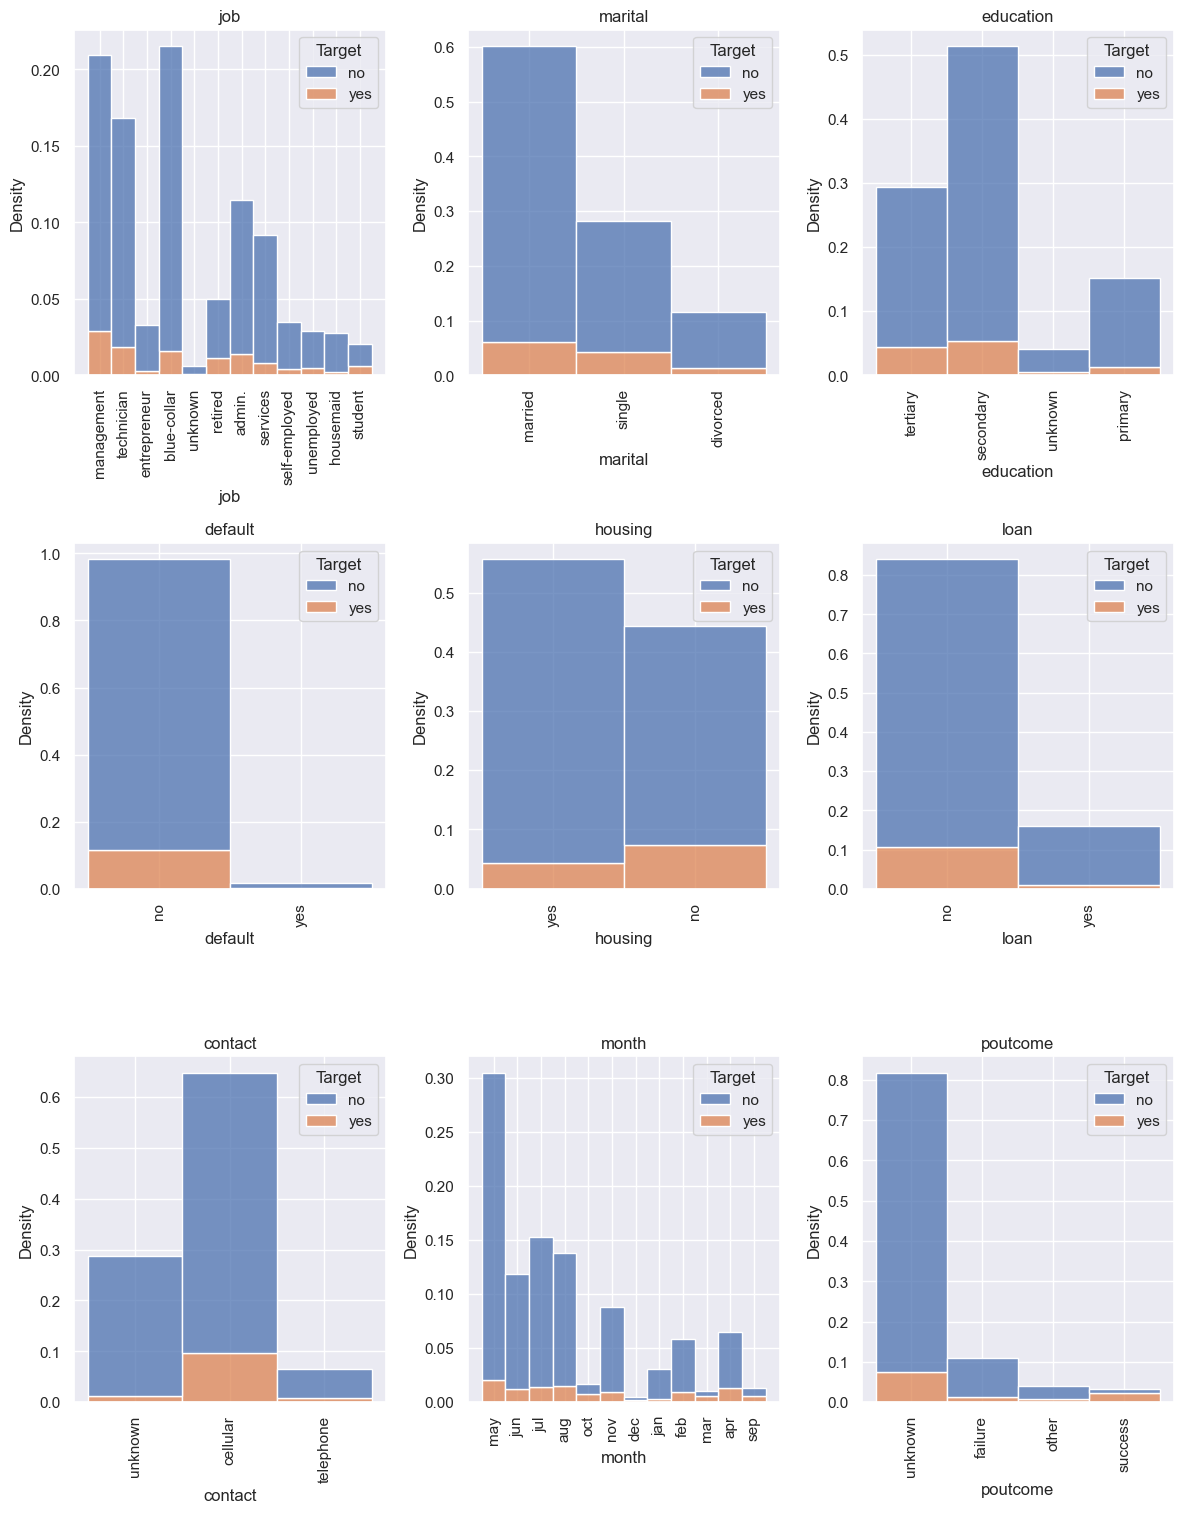

In [57]:
# Tạo biểu đồ với subplots
num_col = len(col_vars)
num_row = (num_col + 2) //3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

for i, var in enumerate(col_vars):
    sns.histplot(x = var,data =data, hue = 'Target', stat='density',multiple='stack', ax = ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel('Density')
    ax[i].tick_params(axis = 'x', rotation = 90)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
fig.delaxes(ax[9])
plt.show()

## Với các biến số int

In [67]:
# Lấy ra tên tất cả cột loại int
int_vars = data.select_dtypes(include='int').columns.tolist()

### Tạo biểu đồ boxplot

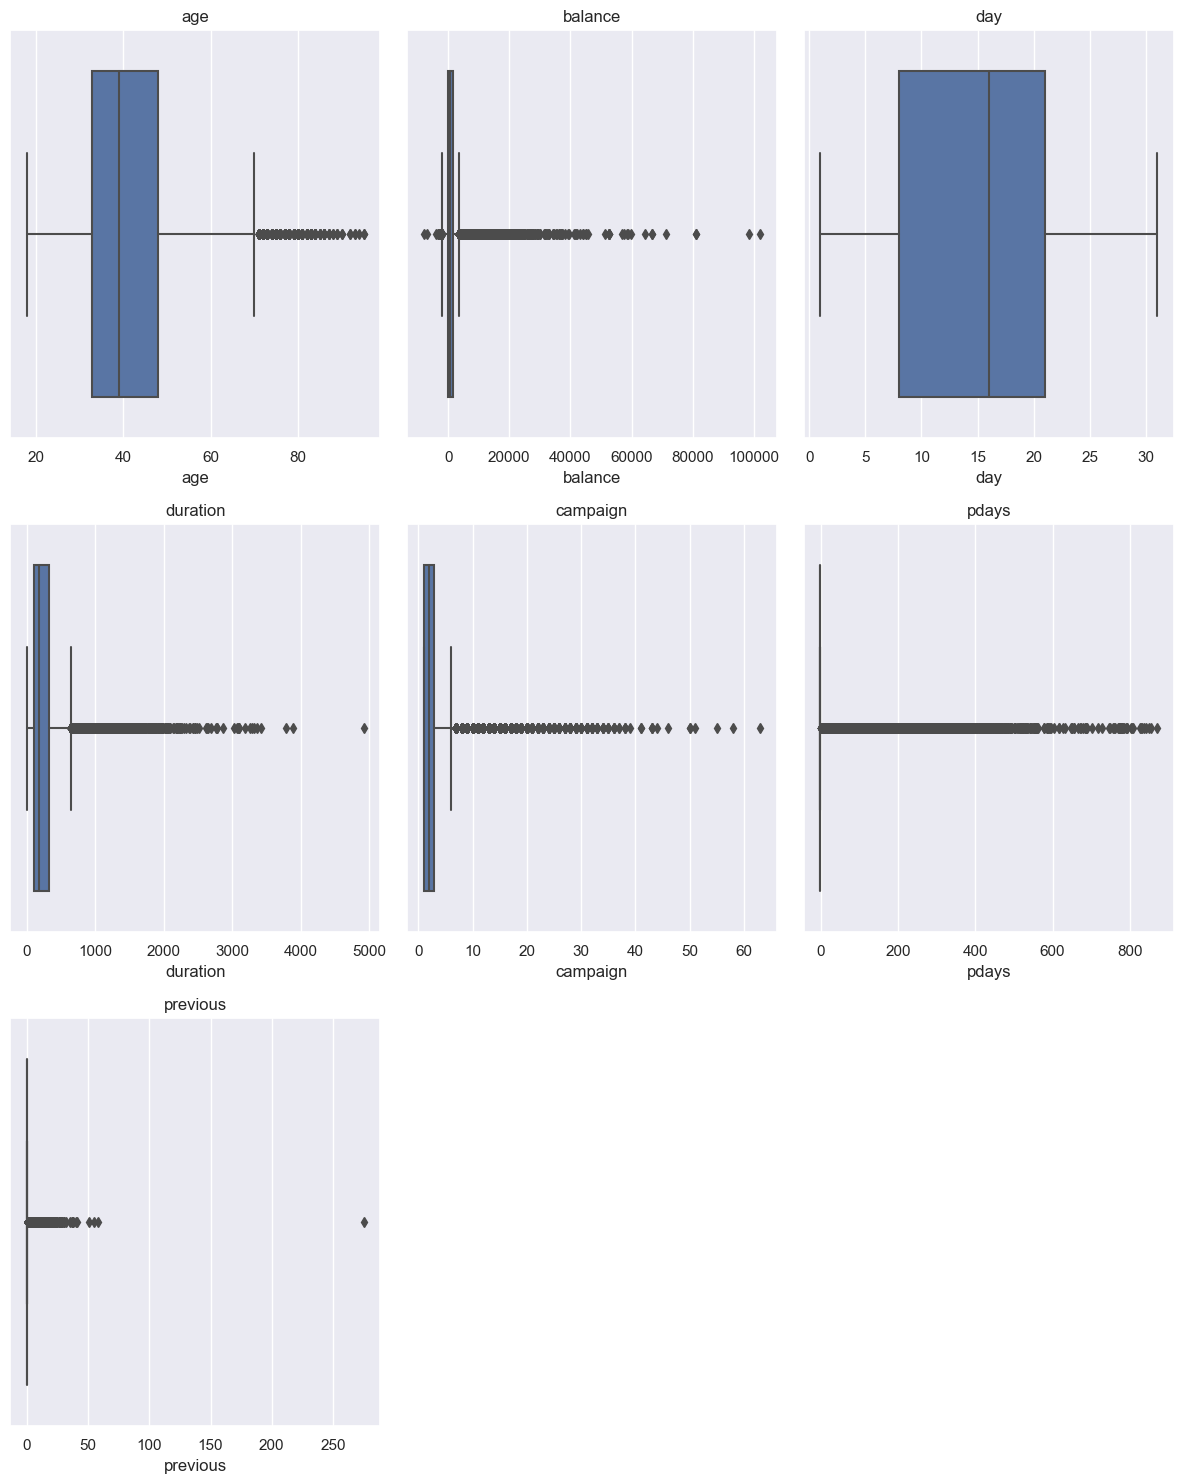

In [58]:
# Tạo biểu đồ với subplots
num_col = len(int_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo box plot cho mỗi biến số nguyên sử dụng Seaborn
for i, var in enumerate(int_vars):
    sns.boxplot(x = data[var], ax = ax[i])
    ax[i].set_title(var)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

### Tạo biểu đồ histogram

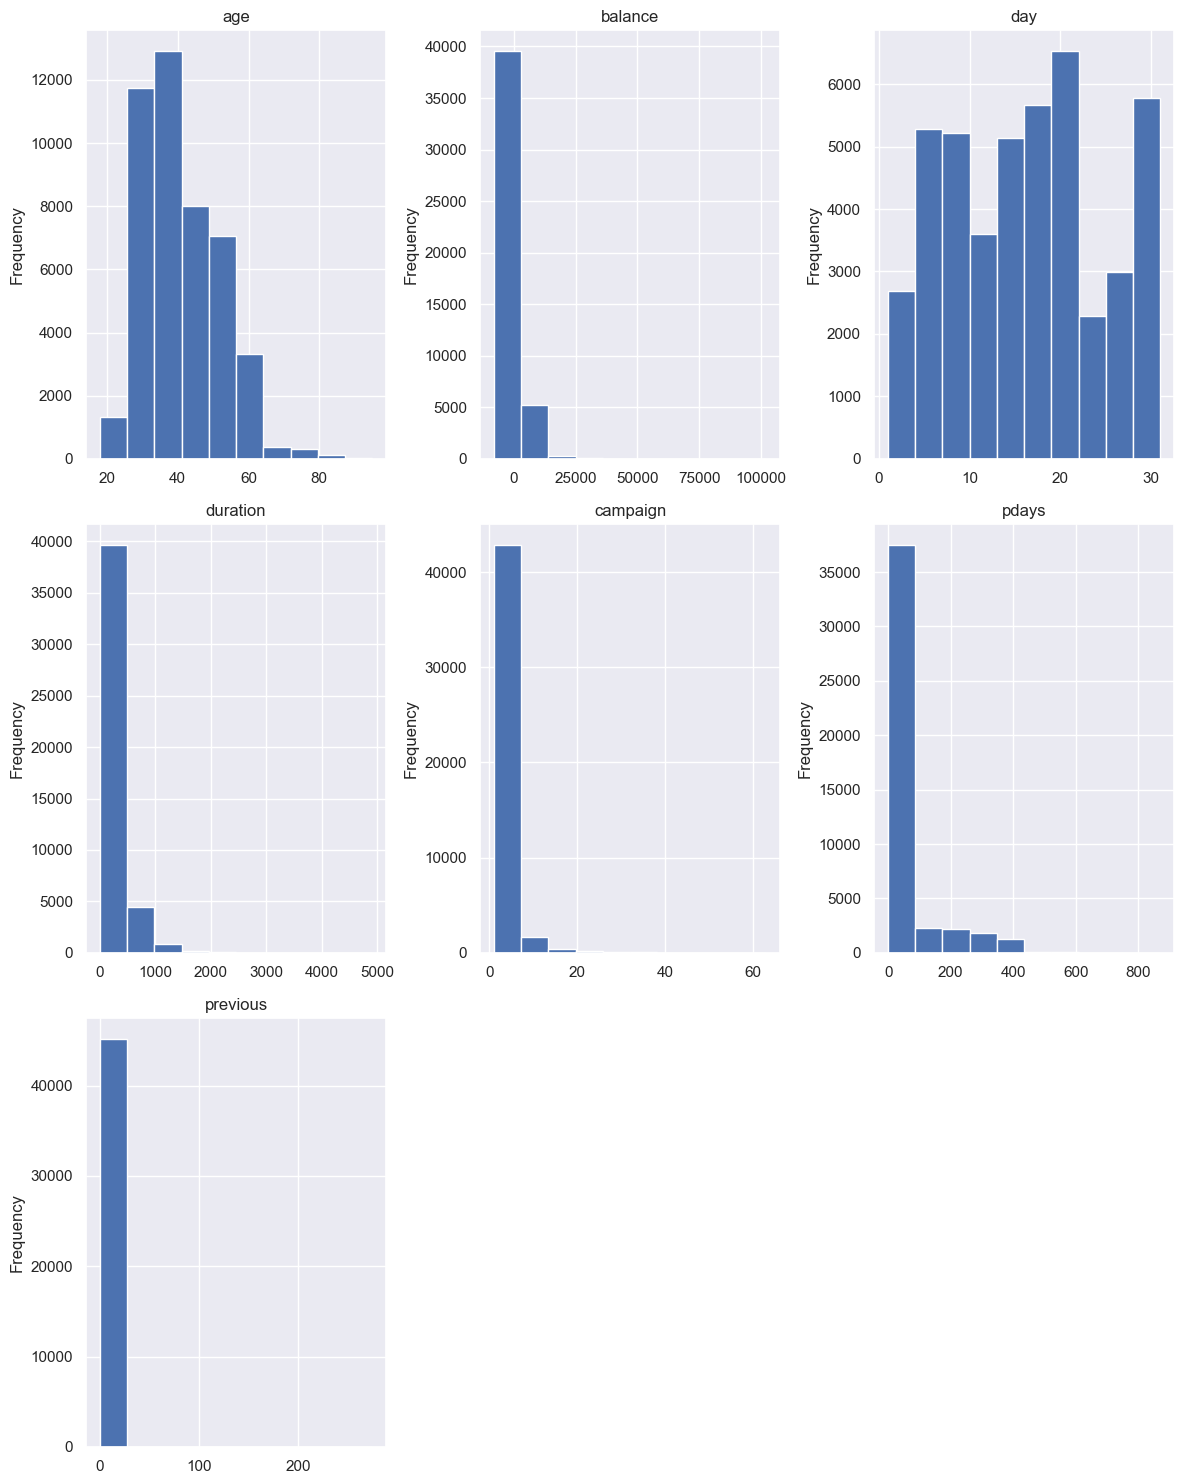

In [61]:
# Tạo biểu đồ với subplots
num_col = len(int_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo histogram cho mỗi biến số nguyên sử dụng Seaborn
for i, var in enumerate(int_vars):
#     sns.histplot(x = data[var], ax = ax[i]) Có thể dùng cách này
    data[var].plot.hist(ax = ax[i])
    ax[i].set_title(var)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

### Tạo biểu đồ boxplot với phân biệt là Target

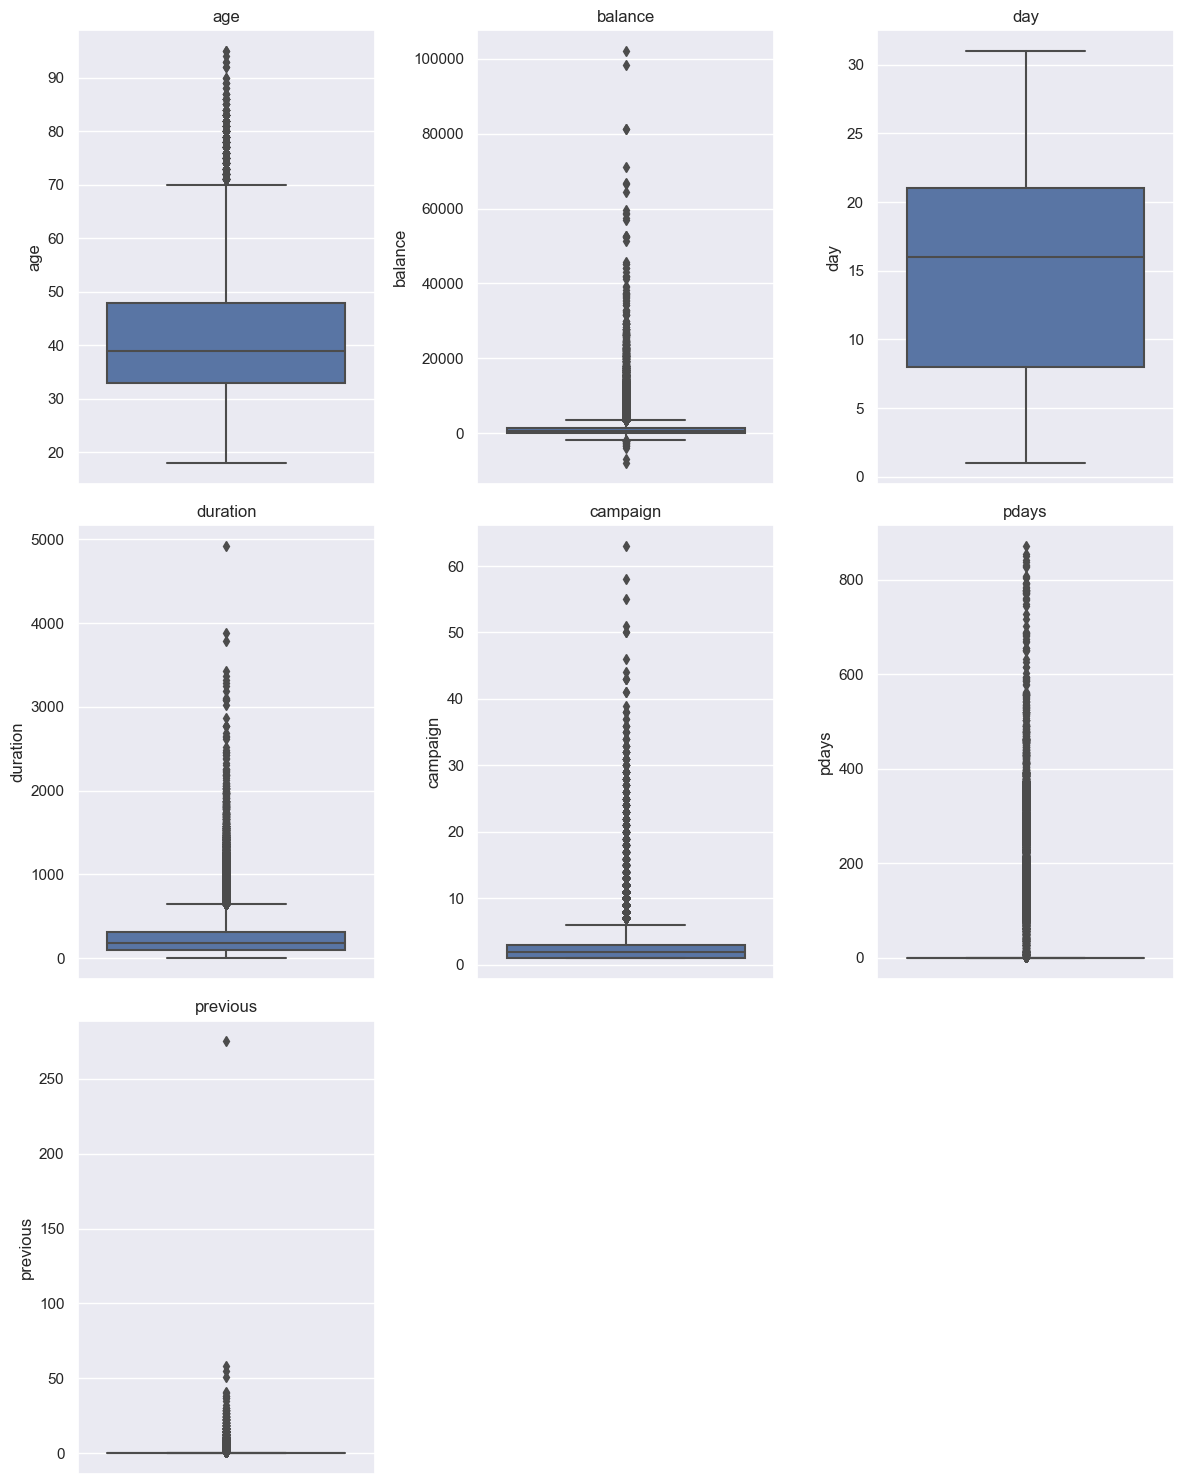

In [63]:
# Tạo biểu đồ với subplots
num_col = len(int_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo box plot cho mỗi biến số nguyên sử dụng Seaborn với hue là Target
for i, var in enumerate(int_vars):
    sns.boxplot(y = var,hue = 'Target',data = data, ax = ax[i]) 
    ax[i].set_title(var)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

### Tạo biểu đồ histogram

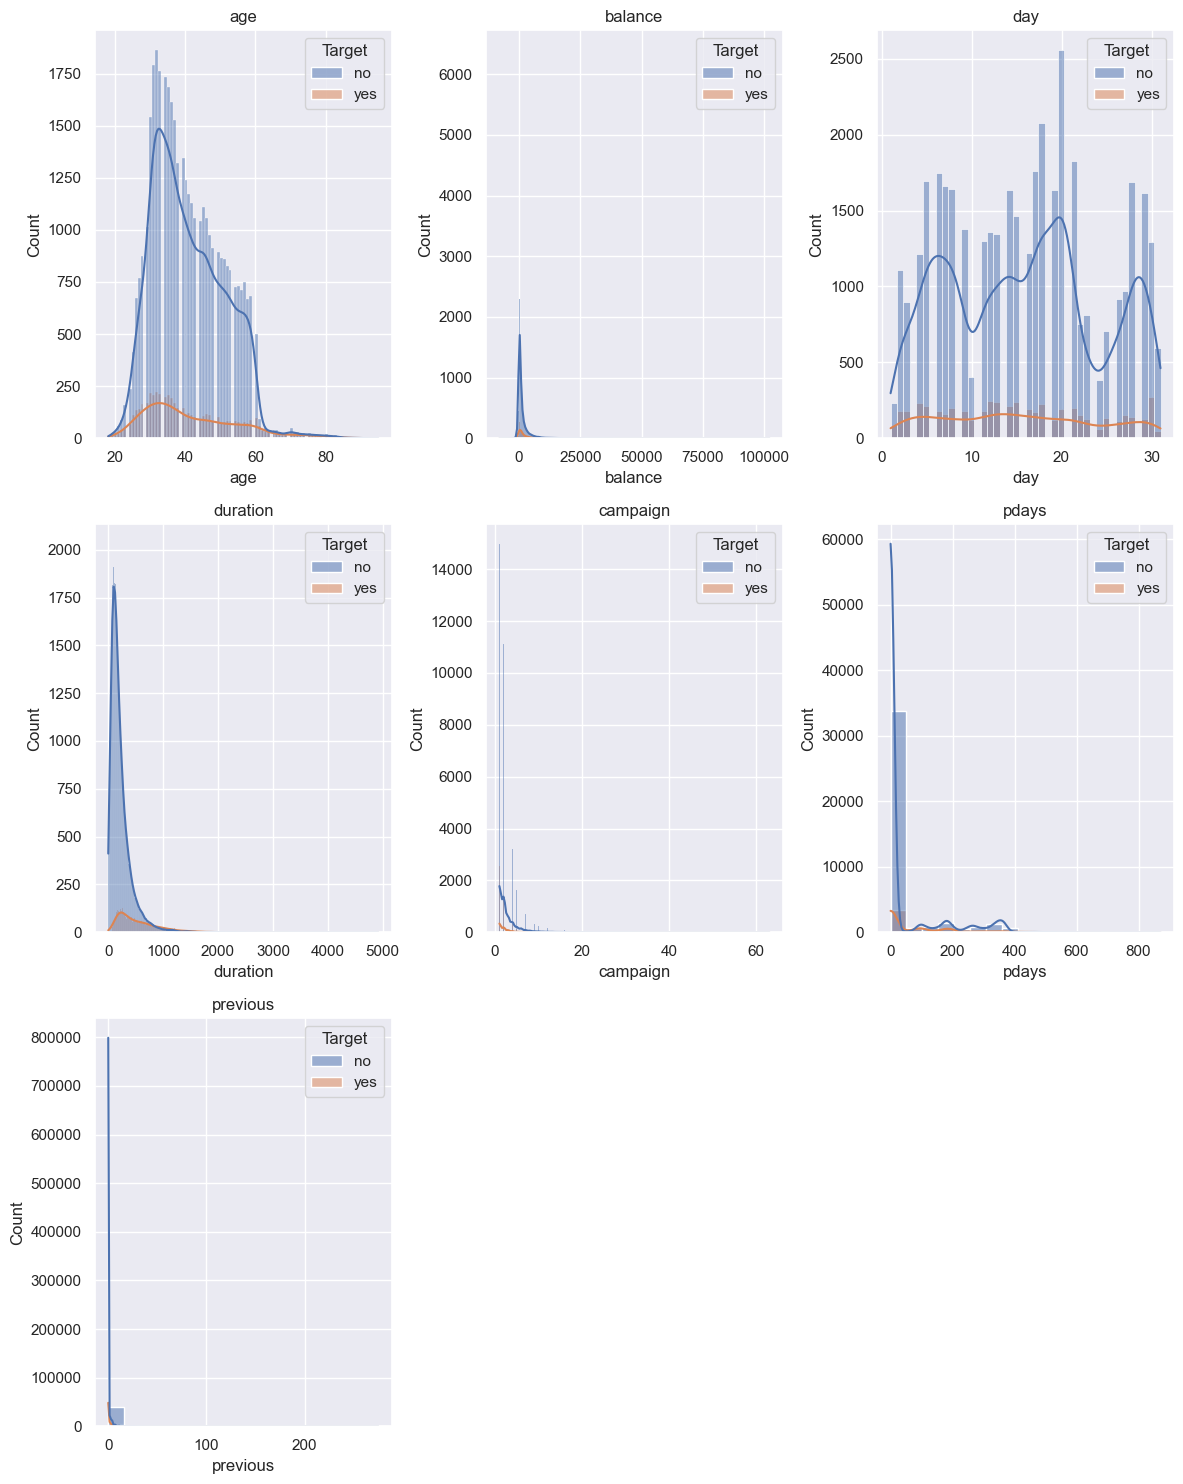

In [64]:
# Tạo biểu đồ với subplots
num_col = len(int_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo histogram cho mỗi biến số nguyên sử dụng Seaborn với hue là Target
for i, var in enumerate(int_vars):
    sns.histplot(x = var,hue = 'Target', kde = True,data = data, ax = ax[i]) 
    ax[i].set_title(var)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

### Tạo biểu đồ violinplot

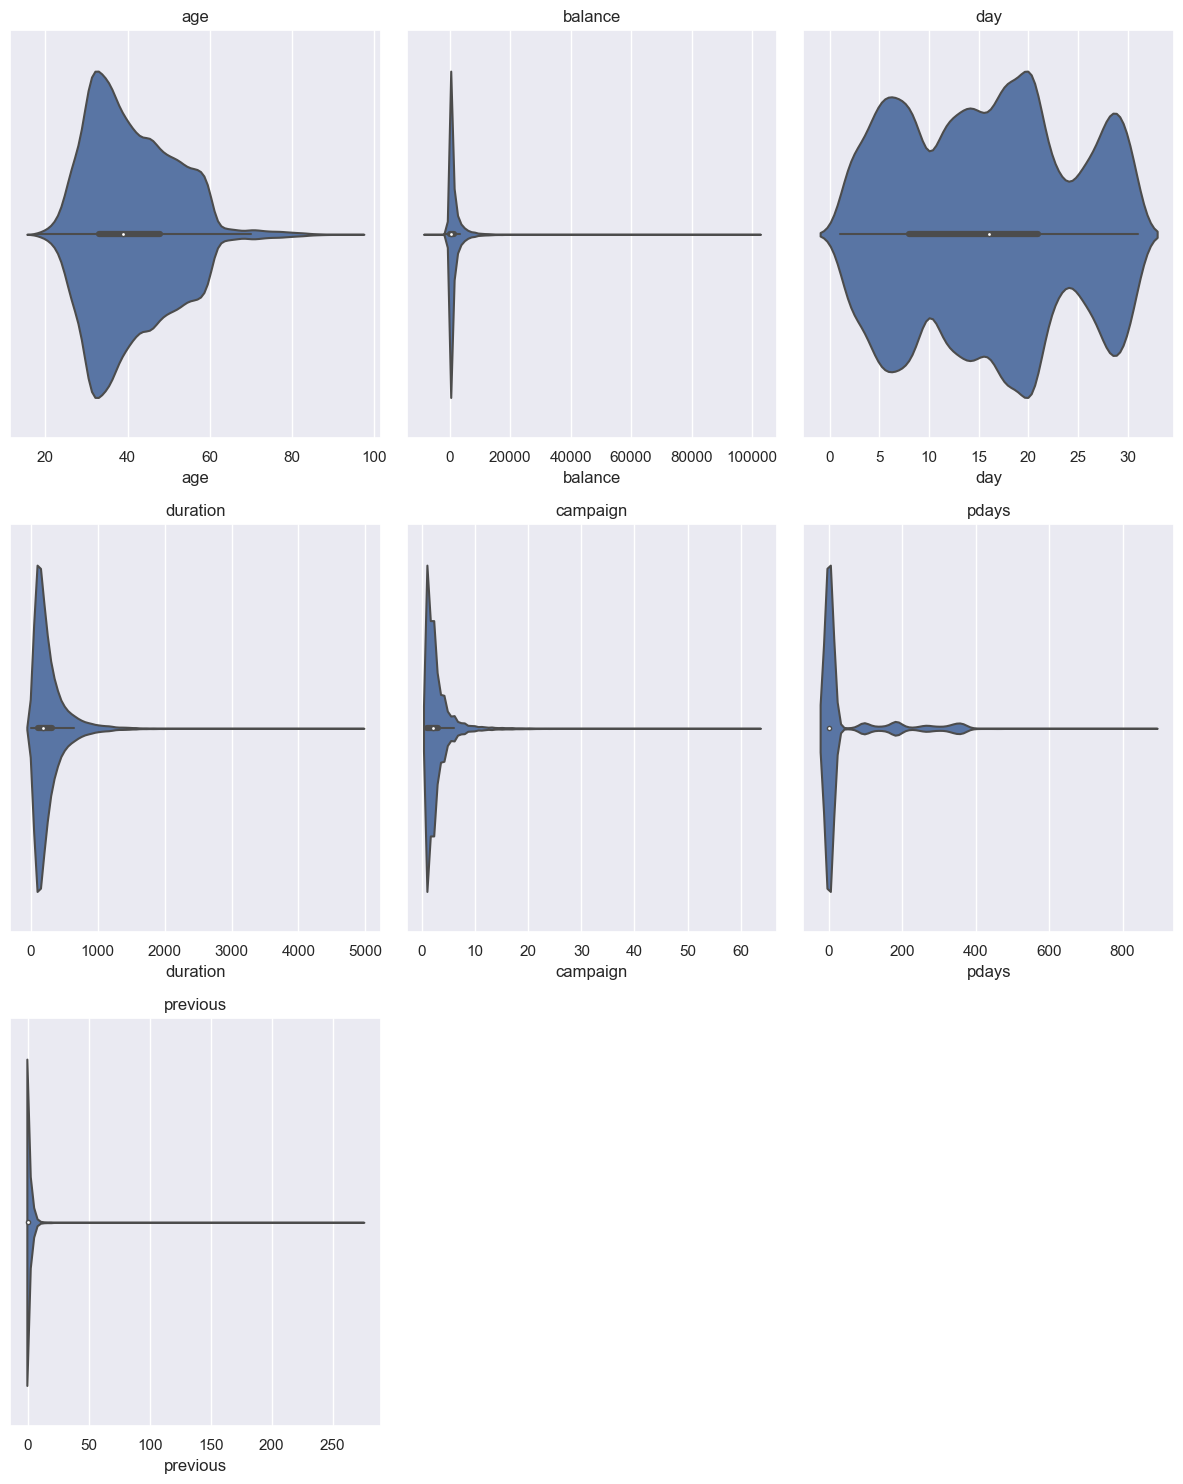

In [65]:
# Tạo biểu đồ với subplots
num_col = len(int_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo box plot cho mỗi biến số nguyên sử dụng Seaborn
for i, var in enumerate(int_vars):
    sns.violinplot(x = data[var], ax = ax[i])
    ax[i].set_title(var)
    
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

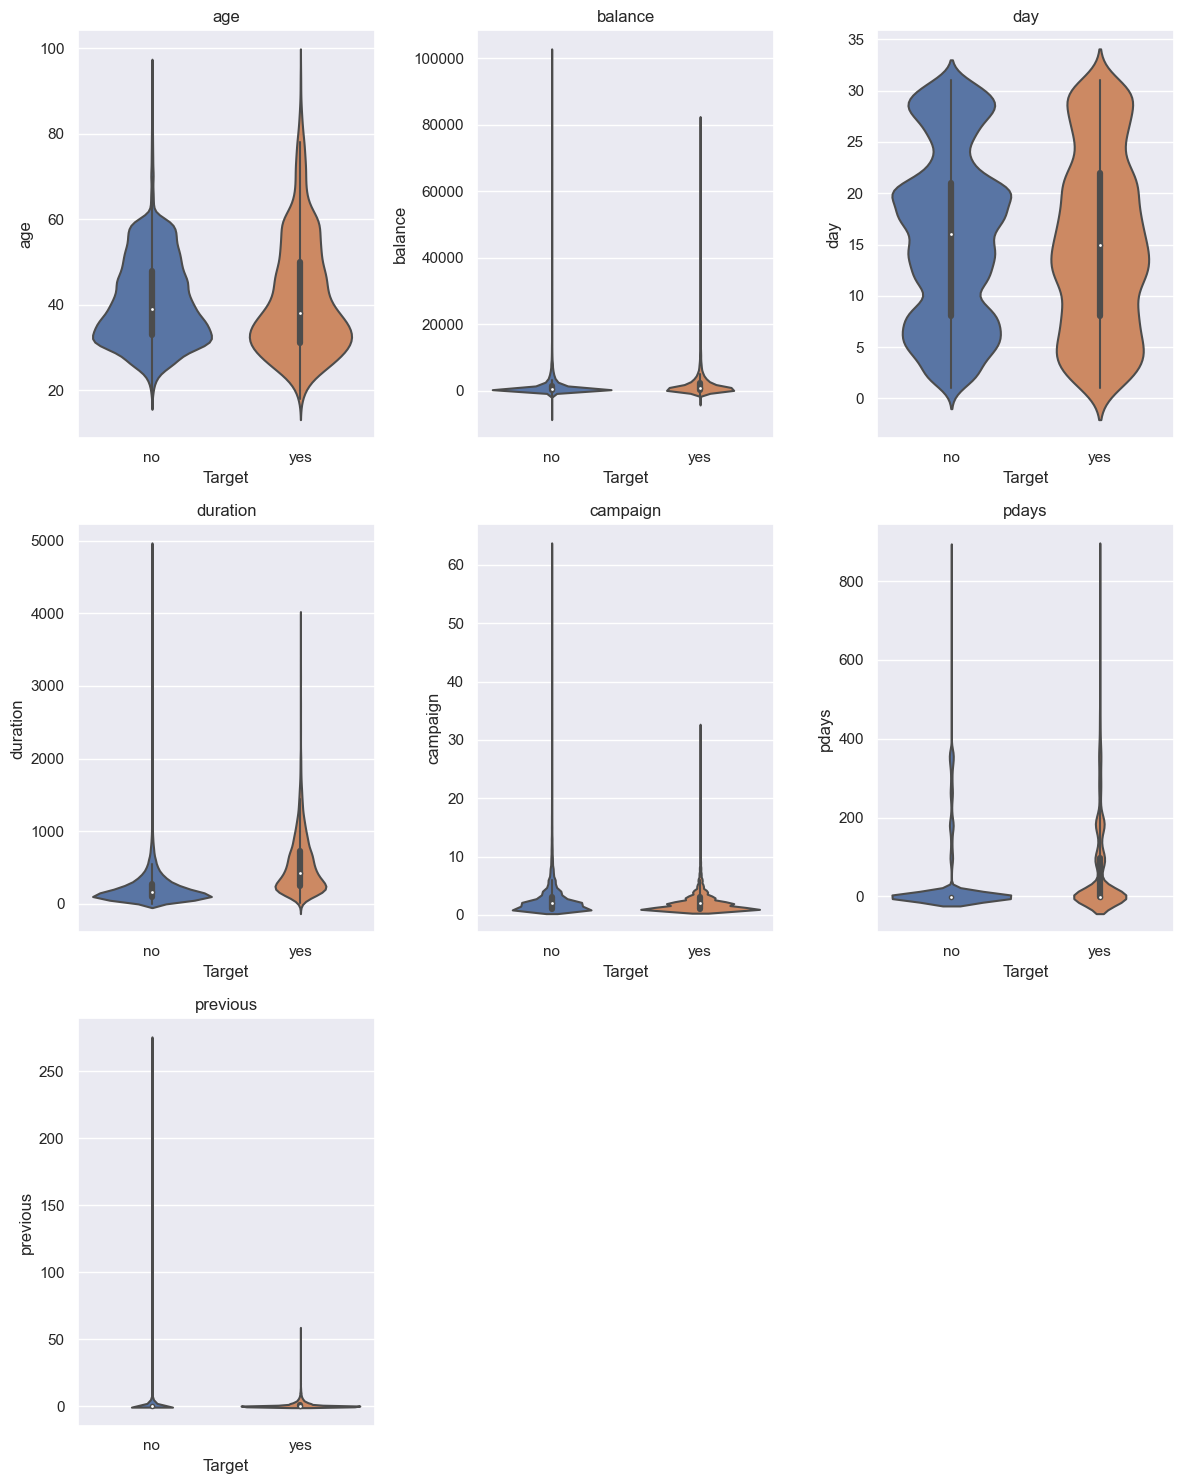

In [69]:
# Tạo biểu đồ với subplots
num_col = len(int_vars)
num_row = (num_col + 2) // 3 # Để có thể chắc rằng có đủ dòng dữ liệu cho subplots
fig, ax = plt.subplots(nrows= num_row, ncols=3, figsize = (12, 5*num_row))
ax = ax.flatten()

# Tạo box plot cho mỗi biến số nguyên sử dụng Seaborn
for i, var in enumerate(int_vars):
    if i < len(ax):
        sns.violinplot(x = 'Target', y = var, data = data, ax = ax[i])
        ax[i].set_title(var)
    else:
        break
# Loại bỏ tất cả biểu đồ trống nếu cần
if num_col < len(ax):
    for i in range(num_col, len(ax)):
        fig.delaxes(ax[i])
        
# Tách từng biểu đồ ra một khoảng
fig.tight_layout()
plt.show()

# Data Processing P2

In [4]:
# Kiểm tra giá trị thiếu
check_miss = data.isnull().sum() * 100/ data.shape[0]
check_miss[check_miss > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label encoding for object Datatypes

In [3]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
Target: ['no' 'yes']


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Chạy vòng lặp cho mỗi thuộc tính object
for col in data.select_dtypes(include='object').columns:
    # Khởi tạo LabelEncoder
    label_encode = LabelEncoder()
    # Fit encoder thành những giá trị riêng biệt trong cột
    label_encode.fit(data[col].unique())
    # Biến đổi các cột thành encoder
    data[col] = label_encode.transform(data[col])
    # In ra cột và các giá trị sau khi đc mã hóa
    print(f"{col}: {data[col].unique()}")

job: [ 4  9  2  1 11  5  0  7  6 10  3  8]
marital: [1 2 0]
education: [2 1 3 0]
default: [0 1]
housing: [1 0]
loan: [0 1]
contact: [2 0 1]
month: [ 8  6  5  1 10  9  2  4  3  7  0 11]
poutcome: [3 0 1 2]
Target: [0 1]


<Axes: >

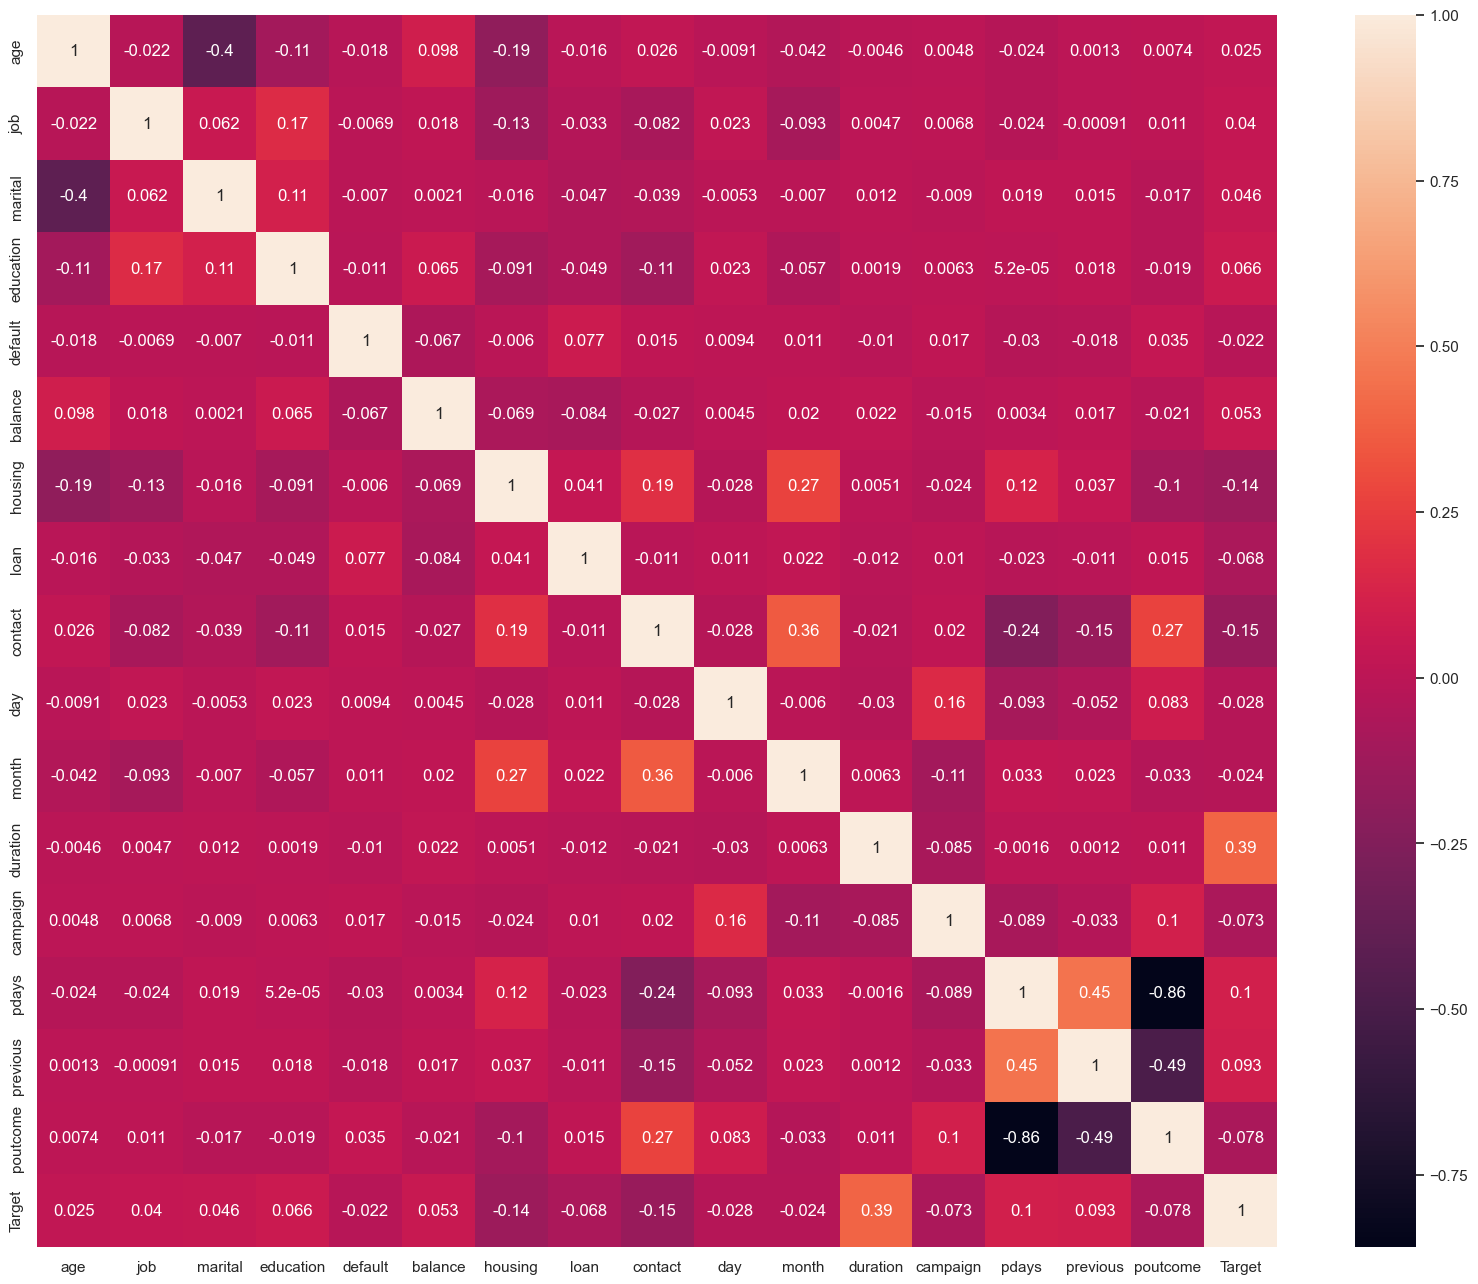

In [7]:
# Correlation heatmap
plt.figure(figsize = (20, 16)) 
sns.heatmap(data.corr(), fmt = '.2g', annot=True) # Corr dùng để tìm mối tương quan giữa các cặp dữ liệu trong bảng dữ liệu

# Train test split

In [8]:
X = data.drop('Target',axis =1)
y = data['Target']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Remove outlier from Train Data using IQR

In [9]:
from scipy import stats
select_col = ['age','balance','day','duration', 'campaign','pdays','previous','poutcome']
# Tính toán z-score cho mỗi cột được lựa chọn trong training data
z_scores = np.abs(stats.zscore(X_train[select_col]))
# Chọn một ngưỡng giá trị để truy tìm ngoại lai
threhold = 3
# Tìm chỉ số của giá trị ngoại lai dựa trên ngưỡng giới hạn
outlier_indices = np.where(z_scores > threhold)[0]

# Loại bỏ giá trị ngoại lai khỏi dữ liệu huấn luyện
X_train = X_train.drop(X_train.index[outlier_indices])
Y_train = Y_train.drop(Y_train.index[outlier_indices])

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[1, 2, 3, 4],
    'random_state':[0, 42]
}
# thực hiện tìm kiếm lưới với xác thực chéo để tìm siêu tham số
grid_search = GridSearchCV(dtree,param_grid,cv = 5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [11]:
dtree2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf= 1, min_samples_split= 2, random_state= 42)
dtree2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [12]:
y_pred = dtree2.predict(X_test)
print('Accurancy Score:',accuracy_score(Y_test,y_pred)*100,'%')

Accurancy Score: 89.65644352698318 %


In [15]:
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score,jaccard_score,log_loss
print('F1_score: ',f1_score(Y_test,y_pred,average='micro'))
print('Precision_score: ',precision_score(Y_test,y_pred,average='micro'))
print('Recall_score: ',recall_score(Y_test,y_pred,average='micro'))
print('Jaccard_score: ',jaccard_score(Y_test,y_pred,average='micro'))
print('Log loss: ',log_loss(Y_test,y_pred))

F1_score:  0.8965644352698319
Precision_score:  0.8965644352698319
Recall_score:  0.8965644352698319
Jaccard_score:  0.8125208792677223
Log loss:  3.72819564324177


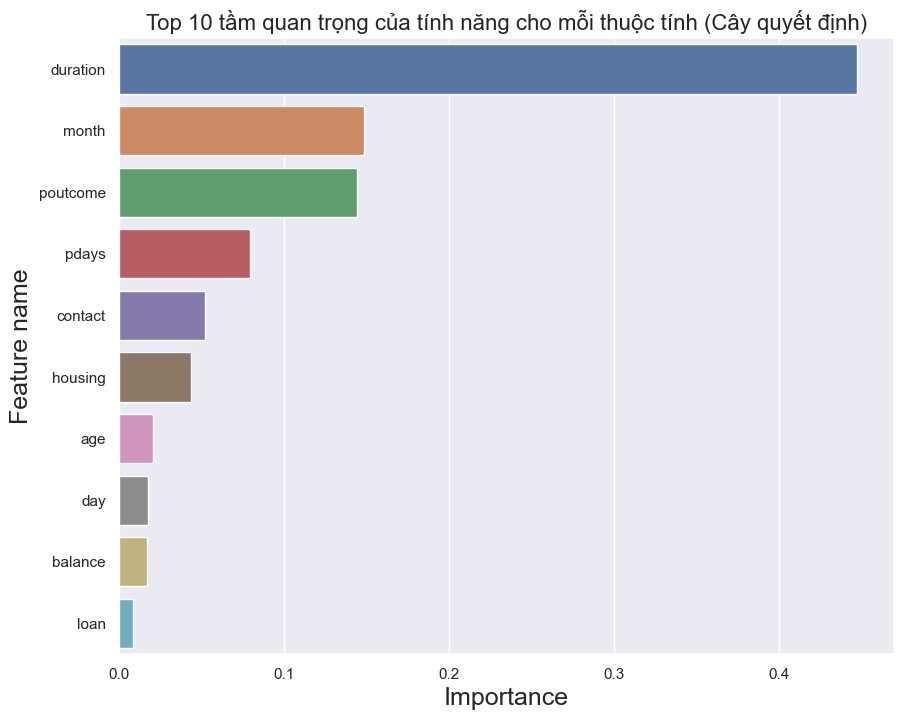

In [26]:
imp_df = pd.DataFrame({
    "Feature name":X_train.columns,
    "Importance":dtree2.feature_importances_
})
imp_df

fi = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data = fi.head(10), x = 'Importance',y ='Feature name')
plt.title('Top 10 tầm quan trọng của tính năng cho mỗi thuộc tính (Cây quyết định)', fontsize= 16)
plt.xlabel("Importance", fontsize= 18)
plt.ylabel("Feature name", fontsize=18)
plt.show()

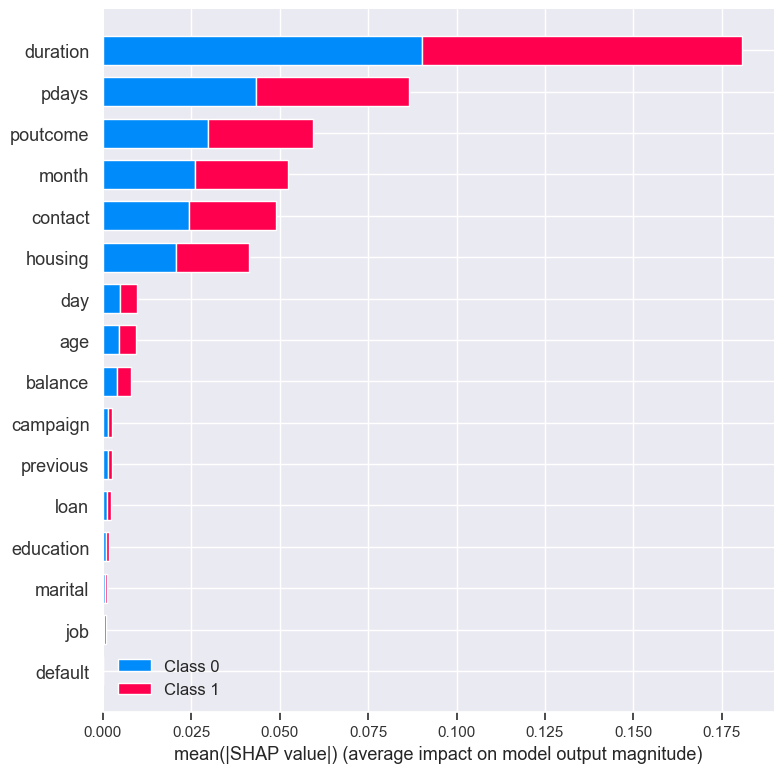

In [30]:
import shap
explainer = shap.TreeExplainer(dtree2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

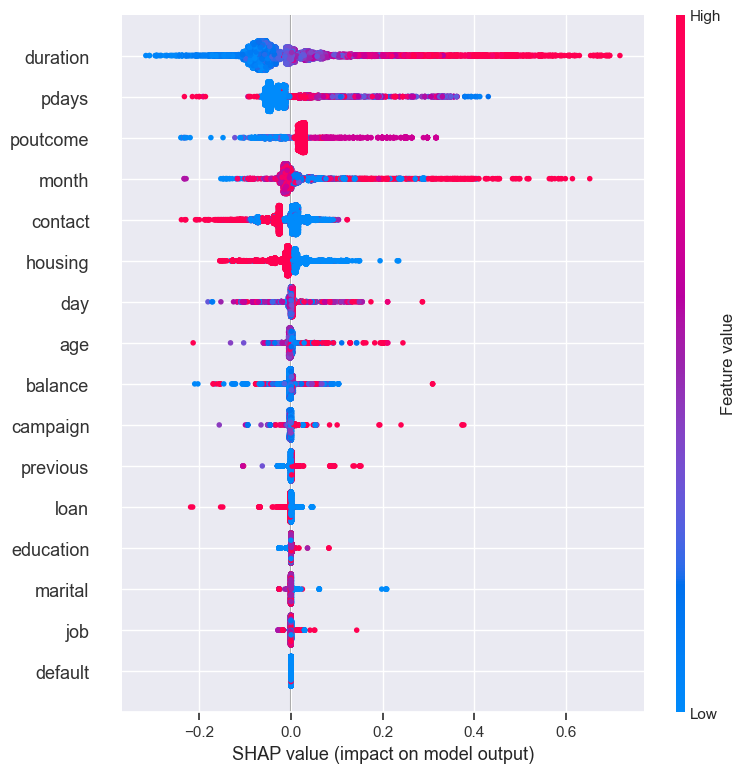

In [32]:
# Tính toán giá trị SHAP
explainer = shap.TreeExplainer(dtree2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values, feature_names=X_test.columns)

Text(0.5, 1.0, 'Accurancy Score for Decision Tree: 0.8965644352698319')

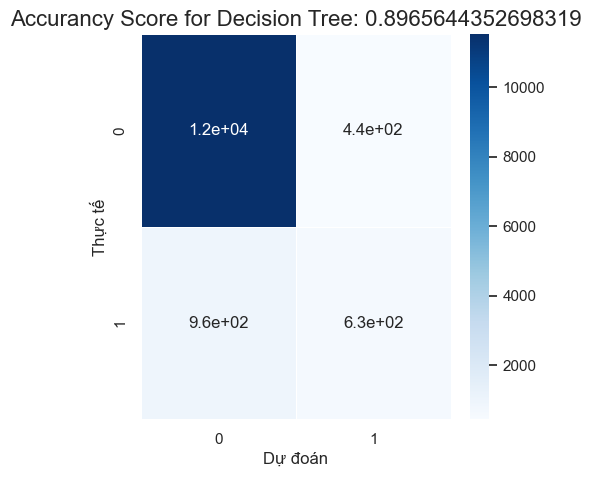

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True, cmap='Blues')
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
all_sample_title = 'Accurancy Score for Decision Tree: {0}'.format(dtree2.score(X_test,Y_test))
plt.title(all_sample_title, size = 16)

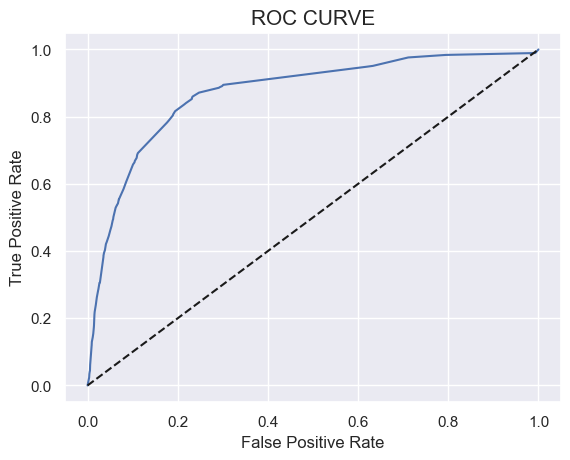

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba =dtree2.predict_proba(X_test)[:][:,1]
a = pd.DataFrame(np.array(Y_test),columns=['y_actual'])
b = pd.DataFrame(np.array(y_pred_proba),columns=['y_pred_proba'])
df_actual_pred = pd.concat([a,b],axis=1)
df_actual_pred.index = Y_test.index
fpr, tpr,tr = roc_curve(df_actual_pred['y_actual'], df_actual_pred['y_pred_proba'])
auc = roc_auc_score(df_actual_pred['y_actual'],df_actual_pred['y_pred_proba'])

plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)
plt.plot(fpr,fpr,linestyle = '--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE', size =15)
plt.show()


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators':[100,200],
    'max_depth':[None,5, 10],
    'max_features':['sqrt','log2',None],
    'random_state':[0,42]
}

grid_search = GridSearchCV(rfc, param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [51]:
rfc2 = RandomForestClassifier(max_depth= None, max_features= 'sqrt', n_estimators= 200, random_state= 0)
rfc2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [53]:
y_pred = rfc2.predict(X_test)
print('Accurancy Score: ',accuracy_score(Y_test,y_pred)*100)

Accurancy Score:  90.00294898260101


In [54]:
print('F1_score: ',f1_score(Y_test,y_pred,average='micro'))
print('Precision_score: ',precision_score(Y_test,y_pred,average='micro'))
print('Recall_score: ',recall_score(Y_test,y_pred,average='micro'))
print('Jaccard_score: ',jaccard_score(Y_test,y_pred,average='micro'))
print('Log loss: ',log_loss(Y_test,y_pred))

F1_score:  0.90002948982601
Precision_score:  0.90002948982601
Recall_score:  0.90002948982601
Jaccard_score:  0.8182305630026809
Log loss:  3.6033024178445046


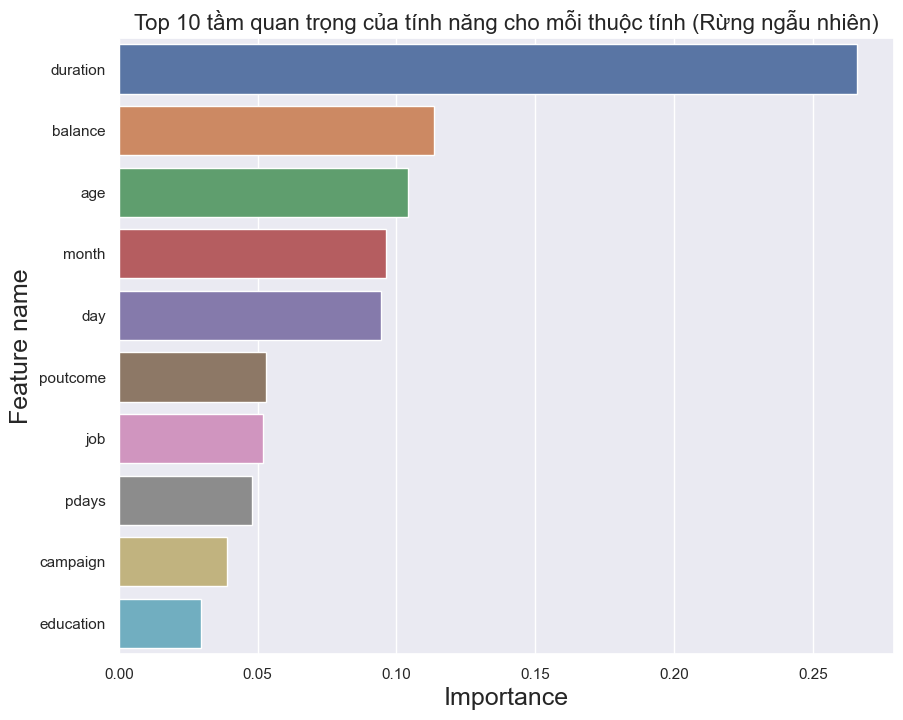

In [56]:
imp_df = pd.DataFrame({
    "Feature name":X_train.columns,
    "Importance":rfc2.feature_importances_
})
imp_df

fi = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data = fi.head(10), x = 'Importance',y ='Feature name')
plt.title('Top 10 tầm quan trọng của tính năng cho mỗi thuộc tính (Rừng ngẫu nhiên)', fontsize= 16)
plt.xlabel("Importance", fontsize= 18)
plt.ylabel("Feature name", fontsize=18)
plt.show()

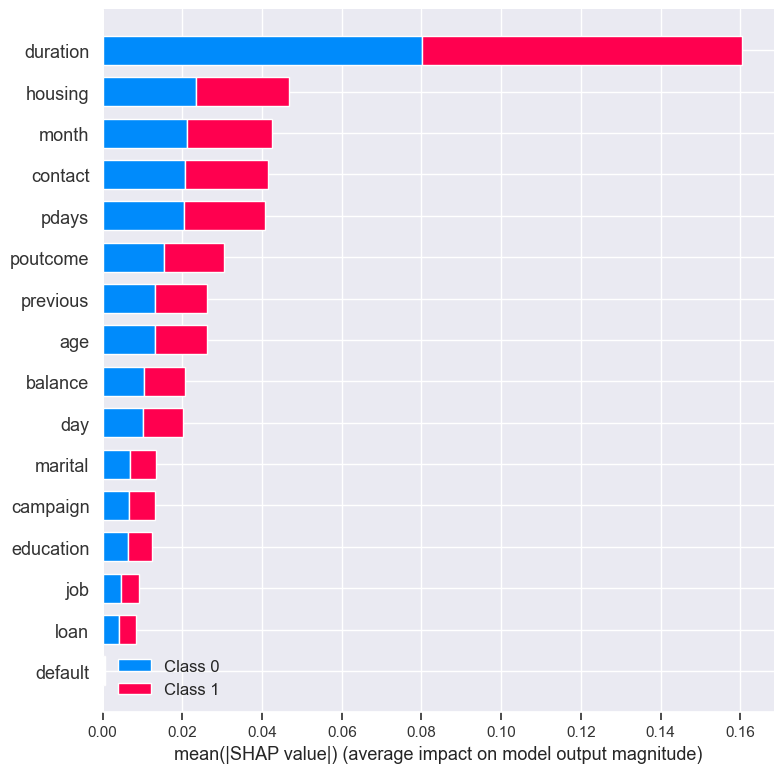

In [57]:
explainer = shap.TreeExplainer(rfc2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


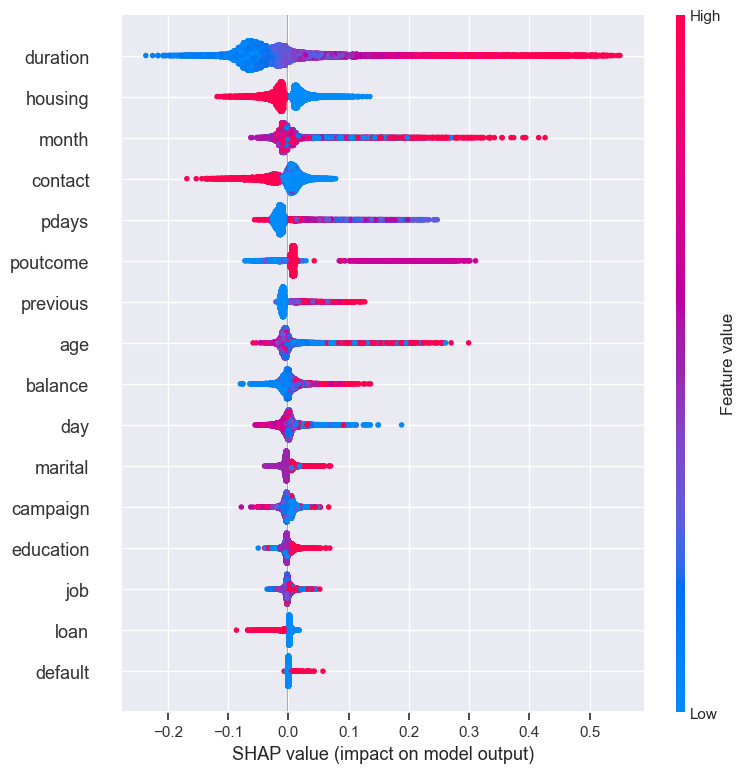

In [58]:
# Tính toán giá trị SHAP
explainer = shap.TreeExplainer(rfc2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values, feature_names=X_test.columns)

Text(0.5, 1.0, 'Accurancy Score for Random Tree: 0.90002948982601')

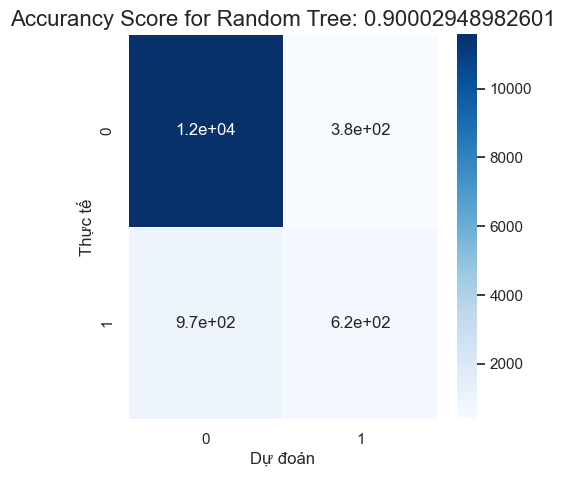

In [59]:
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True, cmap='Blues')
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
all_sample_title = 'Accurancy Score for Random Tree: {0}'.format(rfc2.score(X_test,Y_test))
plt.title(all_sample_title, size = 16)

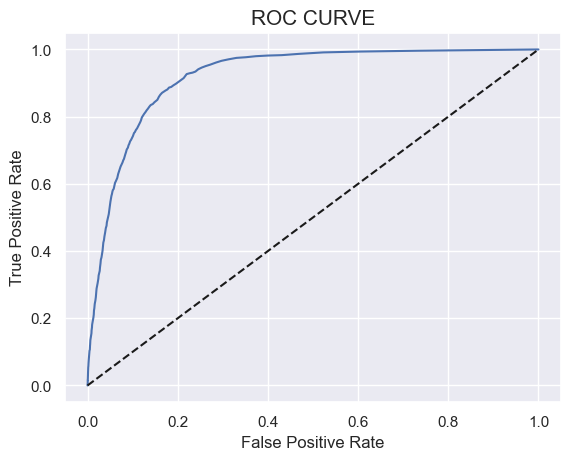

In [86]:
y_pred_proba =rfc2.predict_proba(X_test)[:][:,1]
a = pd.DataFrame(np.array(Y_test),columns=['y_actual'])
b = pd.DataFrame(np.array(y_pred_proba),columns=['y_pred_proba'])
df_actual_pred = pd.concat([a,b],axis=1)
df_actual_pred.index = Y_test.index
fpr, tpr,tr = roc_curve(df_actual_pred['y_actual'], df_actual_pred['y_pred_proba'])
auc = roc_auc_score(df_actual_pred['y_actual'],df_actual_pred['y_pred_proba'])

plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)
plt.plot(fpr,fpr,linestyle = '--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE', size =15)
plt.show()

# XGBoost

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid = {
    'n_estimators':[100, 200],
    'max_depth':[3, 5, 7],
    'learning_rate':[0.1, 0.01, 0.001],
    'gamma':[0, 0.1 ,0.2]
}

grid_search = GridSearchCV(xgb, param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [89]:
xgb = XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 5, n_estimators= 100)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_pred = xgb.predict(X_test)
print('Accurancy Score: ',accuracy_score(Y_test,y_pred)*100)

Accurancy Score:  90.03981126511353


In [92]:
print('F1_score: ',f1_score(Y_test,y_pred,average='micro'))
print('Precision_score: ',precision_score(Y_test,y_pred,average='micro'))
print('Recall_score: ',recall_score(Y_test,y_pred,average='micro'))
print('Jaccard_score: ',jaccard_score(Y_test,y_pred,average='micro'))
print('Log loss: ',log_loss(Y_test,y_pred))

F1_score:  0.9003981126511353
Precision_score:  0.9003981126511353
Recall_score:  0.9003981126511353
Jaccard_score:  0.8188400938652364
Log loss:  3.59001590450437


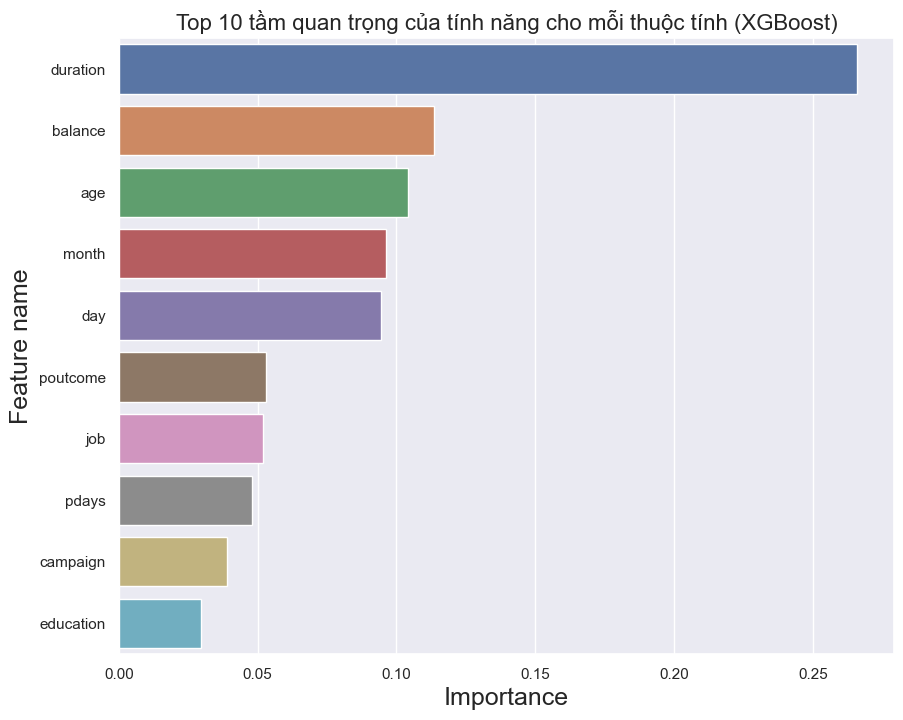

In [94]:
imp_df = pd.DataFrame({
    "Feature name":X_train.columns,
    "Importance":rfc2.feature_importances_
})
imp_df

fi = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data = fi.head(10), x = 'Importance',y ='Feature name')
plt.title('Top 10 tầm quan trọng của tính năng cho mỗi thuộc tính (XGBoost)', fontsize= 16)
plt.xlabel("Importance", fontsize= 18)
plt.ylabel("Feature name", fontsize=18)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


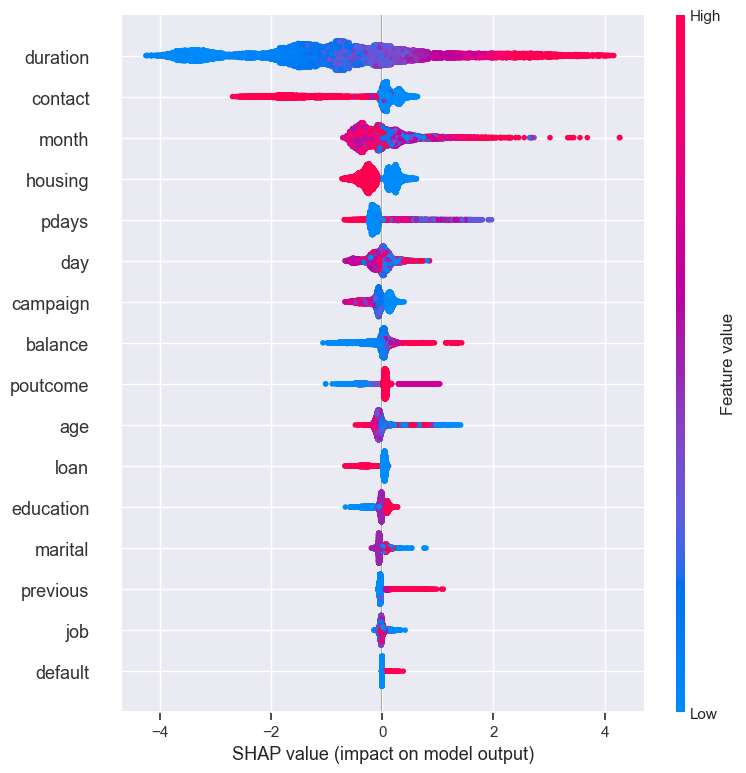

In [96]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accurancy Score for Random Tree: 0.9003981126511353')

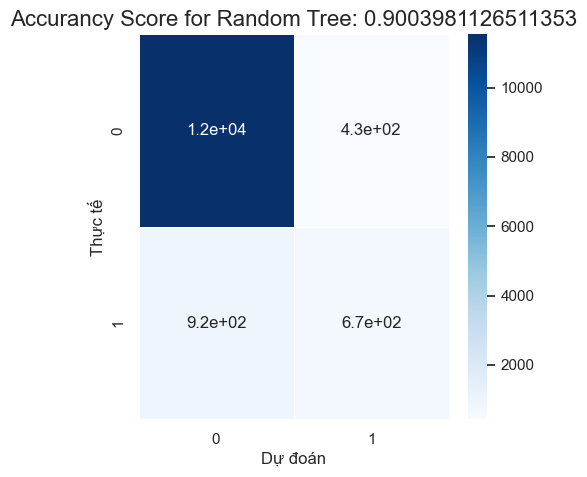

In [98]:
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True, cmap='Blues')
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
all_sample_title = 'Accurancy Score for Random Tree: {0}'.format(xgb.score(X_test,Y_test))
plt.title(all_sample_title, size = 16)

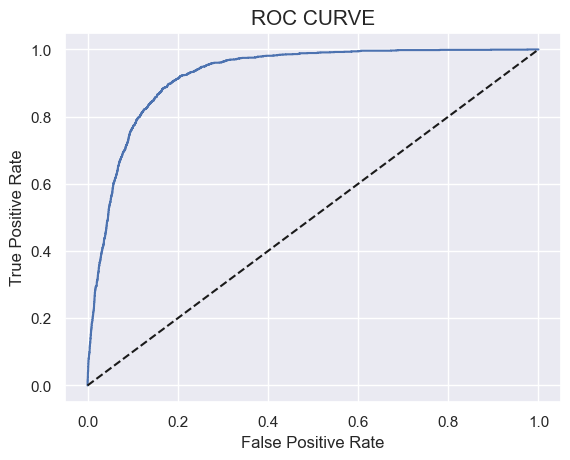

In [99]:
y_pred_proba =xgb.predict_proba(X_test)[:][:,1]
a = pd.DataFrame(np.array(Y_test),columns=['y_actual'])
b = pd.DataFrame(np.array(y_pred_proba),columns=['y_pred_proba'])
df_actual_pred = pd.concat([a,b],axis=1)
df_actual_pred.index = Y_test.index
fpr, tpr,tr = roc_curve(df_actual_pred['y_actual'], df_actual_pred['y_pred_proba'])
auc = roc_auc_score(df_actual_pred['y_actual'],df_actual_pred['y_pred_proba'])

plt.plot(fpr,tpr,label = 'AUC = %0.4f' %auc)
plt.plot(fpr,fpr,linestyle = '--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE', size =15)
plt.show()